In [1]:
# On importe les librairies dont on aura besoin pour la Question1
import os
from utils import *
from tsne import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib.pyplot import figure

In [2]:
#------------Task_0: Chargement et normalisation des donnees----------------------------------------#

#chargement des donnee
hdr_data = load_HDR_data()
country_names = hdr_data["country_names"]
data = hdr_data["X"]

data_scaled = preprocessing.scale(data)
data_2D = tsne(data_scaled, perplexity = 5)
data_scaled

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  138 ...
Mean value of sigma:  2.138247902078275
Iteration  10 : error is  17.263632027206253
Iteration  20 : error is  15.426354737834718
Iteration  30 : error is  14.953554181911525
Iteration  40 : error is  15.94368724084833
Iteration  50 : error is  14.480095426750756
Iteration  60 : error is  15.27075277733726
Iteration  70 : error is  14.669435123620268
Iteration  80 : error is  14.398543746680009
Iteration  90 : error is  14.356439344291516
Iteration  100 : error is  14.734252385306617
Iteration  110 : error is  2.257239990598836
Iteration  120 : error is  1.6527351689961174
Iteration  130 : error is  1.3316998738470829
Iteration  140 : error is  1.0902452134721796
Iteration  150 : error is  0.9849107168288367
Iteration  160 : error is  0.8870461640961408
Iteration  170 : error is  0.8387980631817713
Iteration  180 : error is  0.8044409555571455
Iteration  190 : error is  0.77

array([[-1.03635537e+00, -6.65934742e-01, -3.70435382e-01, ...,
         2.44426139e+00, -7.97354834e-01, -7.79256302e-01],
       [-6.14476193e-01, -3.63635418e-01, -3.46825516e-01, ...,
         4.24004528e-01, -7.97354834e-01, -7.79256302e-01],
       [-3.61348687e-01, -1.62102536e-01, -3.65713409e-01, ...,
         1.39672080e+00, -7.97354834e-01, -7.79256302e-01],
       ...,
       [ 7.35537174e-01,  1.75245985e+00, -3.27937623e-01, ...,
        -3.99063085e-01,  4.62026716e-01,  1.94952978e-01],
       [ 3.13657997e-01,  1.14786120e+00,  7.10691196e-02, ...,
        -3.99063085e-01,  1.02293026e-03,  7.40690583e-01],
       [ 1.24179219e+00,  2.05475917e+00, -3.13771703e-01, ...,
        -3.99063085e-01,  3.92554311e-01,  1.16023985e-01]])

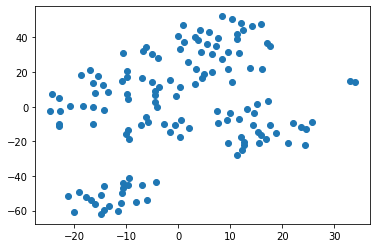

In [3]:
plt.scatter(data_2D[:,0],data_2D[:,1], label='True Position')


In [4]:
#-----------task_1: regroupement des instances en ++ groupes: choix du meilleur clustering-----------------#

#----task_1.1 :essayer plusieurs nombre de clusters et 
#choisir le clustering qui faitle plus de sens pour vous-------------------------------#

#kmeans = KMeans(n_clusters=2, init='k-means++')
#kmeans.fit(data_scaled)

kmeans = KMeans(n_clusters=4)
kmeans.fit(data_2D)

print("Valeur des centre des cluster : les centroïdes \n")
print(kmeans.cluster_centers_) # valeurs des coordonnées centroïdes.

print("\n _____pays associe a chaque centroïdes_____\n")
centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)

for i in range(0, len(index_centroides) ):
    na = index_centroides[i]
    print ("*",country_names[na], " : seras le centroïdes associer au Cluter en X \n" )

Valeur des centre des cluster : les centroïdes 

[[-11.73864617   4.87039422]
 [-12.78496472 -51.80432539]
 [ 12.0592634  -12.79659644]
 [  7.54767156  33.27692046]]

 _____pays associe a chaque centroïdes_____

* Costa Rica  : seras le centroïdes associer au Cluter en X 

* Austria  : seras le centroïdes associer au Cluter en X 

* Jamaica  : seras le centroïdes associer au Cluter en X 

* Zambia  : seras le centroïdes associer au Cluter en X 



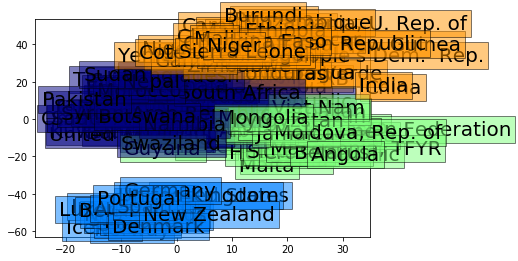

In [5]:
#task_1.2 : affichage du graphe. vous devez réduire la dimensionnalitédes données 
#afin de les visualiser sur l'écran de votre ordinateur.
show_annotated_clustering(data_2D, kmeans.labels_, country_names)



 ##################### __pour k =  2 __ ####################### 
|                                                             |
|             Zimbabwe -> centroïdes associer au Cluter N*: 1 |
|               Israel -> centroïdes associer au Cluter N*: 2 |

 ##################### __pour k =  3 __ ####################### 
|                                                             |
|                Benin -> centroïdes associer au Cluter N*: 1 |
|  Trinidad and Tobago -> centroïdes associer au Cluter N*: 2 |
|              Austria -> centroïdes associer au Cluter N*: 3 |

 ##################### __pour k =  4 __ ####################### 
|                                                             |
|           Costa Rica -> centroïdes associer au Cluter N*: 1 |
|              Austria -> centroïdes associer au Cluter N*: 2 |
|               Zambia -> centroïdes associer au Cluter N*: 3 |
|              Jamaica -> centroïdes associer au Cluter N*: 4 |

 ##################### __pour k =

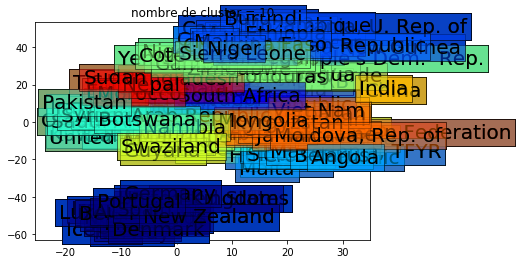

In [39]:
#-------task_2 :Votre deuxième tâche consiste à regrouper les données HDR avec l'algorithme k-means pourk = 2 ... 10 grappes. 
#Choisissez un cluster  (pas assez de grappes, assez de grappes, trop de grappes).puis commenter
k_centroides = {}

SSE = []
for cluster in range(2,11):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_2D)
    SSE.append(kmeans.inertia_)
    
    show_annotated_clustering(data_2D, kmeans.labels_, country_names)
    plt.title("nombre de cluster = "+ str(cluster))
    #plt.savefig('../doc/Graphe/task_1_courbes_apprentissage_avec_max_depth=3.pdf')
    print("\n","#"*21,"__pour k = ", cluster,"__", "#"*23, "\n|"," "*59,"|")
    plt.savefig('../doc/Graphes/'+str(cluster)+'_Means.png')
    
    centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)
    for i in range(0, len(index_centroides) ):
        na = index_centroides[i]
        print ("| %20s -> centroïdes associer au Cluter N*:%2s |" %(country_names[na] ,i+1) )
    
    

In [ ]:
centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)

for i in range(0, len(index_centroides) ):
    na = index_centroides[i]
    print ("*",country_names[na], " : seras le centroïdes associer au Cluter en X \n" )

Text(0, 0.5, 'Inertia')

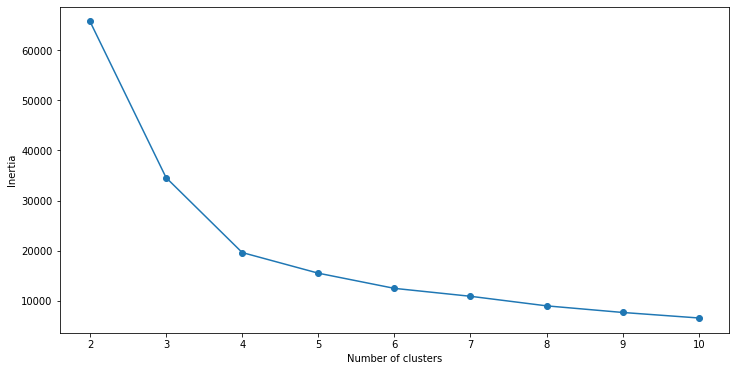

In [10]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(2,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [7]:
color_list=RGB_color(0,1)
color_list

(0.0, 0.0, 0.5, 1.0)

In [8]:
#bbox=dict(facecolor=RGB_color(kmeans.labels_, np.max(kmeans.labels_)+1)
